<a href="https://colab.research.google.com/github/milowia/python_wagon/blob/main/ML_2_Your_first_Regression_NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

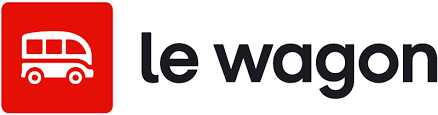

#The dataset 🏀

The dataset contains statistics of **4000** NBA players, including:

- `season`: The season (yearly) the player played in
- `poss`: Possessions played
- `mp`: Minutes played
- `do_ratio`: A player’s ratio of time spent in defense vs. offense; negative values mean more defense positioning
- `pacing`: Player impact on team possessions per 48 minutes
- `win_rating`: Wins Above Replacement rating, how many additional wins a player is worth over a same-level replacement

# Predicting Win Ratings in the NBA

You're finally ready to try out **your first ML model**! 🔥


Your first regression task of this week is to **predict** the Win Rating of NBA players based on their characteristics.


Why is this a regression task?



<details>
    <summary>Answer 💡</summary>
    
Because the Win rating is a continuous feature, as it's on a scale!
</details>


## Import the data




The dataset is available at this link: [https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv).


Load it into a `df`variable.


<details>
    <summary>Tips 💯</summary>
    
You can download the file and upload it to Google Colab, or you can directly but the download link inside the `pd.read_csv()` function!
    
</details>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Le Wagon - DA/Feb 08 - Machine Learning/NBA.csv')
df

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614
...,...,...,...,...,...,...
3995,1986,1224,565,-1.761425,-0.011698,0.082828
3996,1994,3564,1785,0.907199,-0.125856,3.542416
3997,1998,706,378,0.848178,0.694183,0.787185
3998,2003,289,156,-6.298906,0.205844,-0.312601


Do you see the **features and target**?

> **features: season, poss, mp, do_ratio, pacing**
**target: win_rating**



## Simple modelling


### Define X and y


We first need to define our features (X) and our target (y).


Let's start off with a simple example - let `X` be **the number of minutes** a player has played.

You can figure out what `y` should be from the task we are trying to achieve!


In [ ]:
X = df[['mp']]
y = df['win_rating']


### Train test split


Another critical step Machine Learning is the **train, test, split**. \
This is especially important to avoid [data leakage](https://datascientest.com/en/data-leakage-definition-and-prevention).

Use Sklearn `train_test_split`function to create **4 variables** `X_train`, `X_test`, `y_train`, `y_test`. \
Have a look at the lecture if you are unsure about the syntax.




- Use `random_state=0` to compare your final results with your buddy's results.




In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Scaling the features



We need to scale our numerical feature.

Import and instantiate a scaler of your choice from the **Sklearn** library. Then :

1. Fit and transform `X_train` and load the results in a `X_train_scaled`variable
2. Transform `X_test` and load the results in a `X_test_scaled` variable


⚠️  **IMPORTANT!  NEVER** fit the test dataset.


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelling


Here come the exciting part!


**Linear Regression** is the fundamental regression model in Machine Learning!

For now, you don't need to understand the specifics of how it works, just know that it can do regression tasks very easily!

Import, instantiate and fit a **LinearRegression** model on the training data!

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

### Scoring

Let's evaluate the performance of our model. \
Score your fitted model on your **test dataset** and store the result in a variable named `single_score`.



You should obtain a score around 54%.


In [ ]:
single_score = model.score(X_test_scaled, y_test)
single_score

0.5509456884683099

How can we interpret the score?

For now, bigger is better (the scale goes up to 1). We'll understand more in depth how to make sense of this when we study Linear Regressions in detail.


## A more complete features set

It's time to try the **Linear Regression** on all of the relevant features.

Create new `X` and `y` variables, using `poss`,`mp`,`do_ratio`and `pacing`as features this time.


In [ ]:
df

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614
...,...,...,...,...,...,...
3995,1986,1224,565,-1.761425,-0.011698,0.082828
3996,1994,3564,1785,0.907199,-0.125856,3.542416
3997,1998,706,378,0.848178,0.694183,0.787185
3998,2003,289,156,-6.298906,0.205844,-0.312601


In [ ]:
X0 = df.drop(columns=['season', 'win_rating'])
y0 = df['win_rating']

### Train test split


Split `X` and `y` as you did before. \
Remember to set `random_state=0` to compare your results with your buddy's.


In [ ]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0 , test_size = 0.2 , random_state = 0)

### Scaling

Now it's time to scale the data, just like we did before!

In [ ]:
X0_train_scaled = scaler.fit_transform(X0_train)
X0_test_scaled = scaler.transform(X0_test)

### A new model

Because we have a new set of features, we need to train a new model!

Instantiate and train a second model on with your new features.


In [ ]:
model0 = LinearRegression()
model0.fit(X0_train_scaled, y0_train)

LinearRegression()

Score your new fitted model, and store the results in a variable named `multiple_score`.


In [ ]:
multiple_score = model0.score(X0_test_scaled, y0_test)
multiple_score


0.6446947826843756

Compare `single_score`and `multiple_score`.

> **We can observe a substantial increase of the score when we train a model on many features instead of just one.**


## A new player arrives!

These are his stats:

- poss: 4902
- mp: 1845
- do_ratio: 1.011
- pacing: 0.381

Create a single row DataFrame for this new player!

In [ ]:
d = {'poss': 4902, 'mp': 1845, 'do_ratio': 1.011, 'pacing':0.381}
X0_new = pd.DataFrame(data=d, index=[0])
X0_new



,poss,mp,do_ratio,pacing
0,4902,1845,1.011,0.381


Predict the win rating for this new player!


In [ ]:
model0.predict(X0_new)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([1195.77401106])

## What is going on?

That's an astronomical win rating! Did'nt we forget to do something?

We did... can you figure out what we forgot to do and fix the issue? \
Once you have, you can go on with the prediction!

In [ ]:
#your code here

**Congratulations on training your first regression model!** 🎉

